In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
df = pd.read_csv("../data/SERSIC/df_coords_fix.csv", dtype={'objID': 'Int64'})

In [4]:
oid_train = np.load("..\data\DELIGHT\id_train.npy",allow_pickle=True)
oid_val = np.load("..\data\DELIGHT\id_validation.npy",allow_pickle=True)

idx_train = df[df['oid'].isin(oid_train)].index.to_numpy()
idx_val = df[df['oid'].isin(oid_val)].index.to_numpy()
idx_test = np.setdiff1d(df.index, np.union1d(idx_train, idx_val))

In [5]:
df_train = df.iloc[idx_train]
df_val = df.iloc[idx_val]
df_test = df.iloc[idx_test]

In [6]:
train_host = set(df_train['host_name'])
val_host = set(df_val['host_name'])
test_host = set(df_test['host_name'])

# Intersecciones
inter_train_val = train_host & val_host
inter_train_test = train_host & test_host

duplicated_host = (train_host & val_host) | (train_host & test_host)

In [7]:
df_train = df_train[~df_train['host_name'].isin(duplicated_host)].copy()

In [8]:
ser_columns = [
    "host_name", 
    "rSerRadius", "rSerAb", "rSerPhi", 
]

In [9]:
df_train = (
    df_train.dropna(subset=ser_columns)                        # Eliminamos ejemplos con nan
      .loc[~(df_train[ser_columns] == -999).any(axis=1)]       # Eliminamos ejemplos con -999
      .drop_duplicates(subset="host_name")                     # Eliminamos galaxias duplicadas
)

295.891204833984
31.329960823059118
44.82035434294365
40.61134708786516


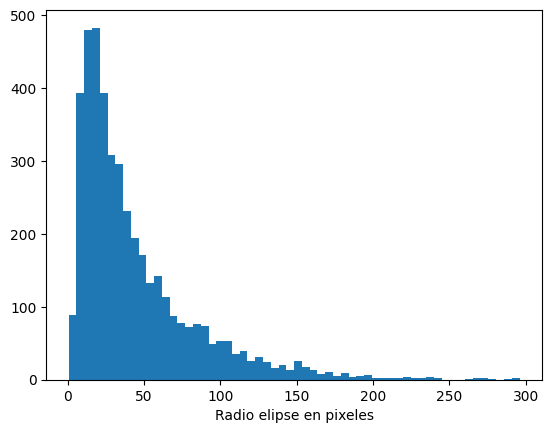

In [10]:
print(df_train["rSerRadius"].max()*3/0.25)
print(df_train["rSerRadius"].median()*3/0.25)
print(df_train["rSerRadius"].mean()*3/0.25)
print(df_train["rSerRadius"].std()*3/0.25)

plt.hist(df_train["rSerRadius"]*3/0.25, bins="auto")
plt.xlabel("Radio elipse en pixeles")
plt.show()

In [11]:
train_oid_sersic = df_train["oid"].values
val_oid_sersic = df_val["oid"].values
test_oid_sersic = df_test["oid"].values

In [ ]:
np.save(f'..\data\SERSIC/id_train.npy', train_oid_sersic)
np.save(f'..\data\SERSIC/id_validation.npy', val_oid_sersic)
np.save(f'..\data\SERSIC/id_test.npy', test_oid_sersic)

df_train.to_csv("../data/SERSIC/df_train.csv", index=False)

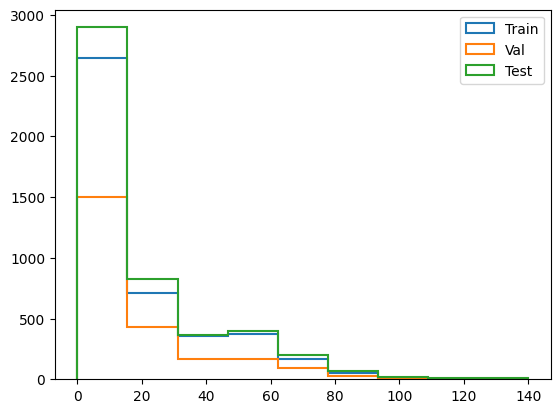

In [12]:
bins= np.linspace(0,140,10)
plt.hist(df_train["hostsize"], bins=bins, histtype="step", label="Train", linewidth=1.5)
plt.hist(df_val["hostsize"], bins=bins, histtype="step", label="Val", linewidth=1.5)
plt.hist(df_test["hostsize"], bins=bins, histtype="step", label="Test", linewidth=1.5)
plt.legend()
plt.show()